In [18]:
import matplotlib.pyplot as plt
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [19]:
dataset_path = 'D:\data_speech_commands_v0.02'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(len(all_targets))

36


In [20]:
feature_sets_path = r'D:\voice_recognition'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'wake_word_stop_model.h5'
wake_word = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]

In [21]:
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


(7717, 16, 16)
(972, 16, 16)
(957, 16, 16)


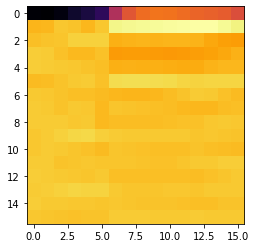

In [22]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
plt.imshow(x_train[0],cmap = 'inferno')

In [23]:
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(7717, 16, 16, 1)
(972, 16, 16, 1)
(957, 16, 16, 1)


In [24]:
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(36, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [27]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [28]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=50, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Train on 7717 samples, validate on 972 samples
Epoch 1/50
7717/7717 [==============================] - 2s 208us/sample - loss: 3.5659 - acc: 0.0478 - val_loss: 3.3596 - val_acc: 0.0741
Epoch 2/50
7717/7717 [==============================] - 0s 61us/sample - loss: 3.3089 - acc: 0.0917 - val_loss: 3.0544 - val_acc: 0.1831
Epoch 3/50
7717/7717 [==============================] - 0s 58us/sample - loss: 3.0695 - acc: 0.1436 - val_loss: 2.7656 - val_acc: 0.2366
Epoch 4/50
7717/7717 [==============================] - 0s 58us/sample - loss: 2.8669 - acc: 0.1911 - val_loss: 2.5724 - val_acc: 0.2984
Epoch 5/50
7717/7717 [==============================] - 0s 56us/sample - loss: 2.6768 - acc: 0.2312 - val_loss: 2.4205 - val_acc: 0.3364
Epoch 6/50
7717/7717 [==============================] - 0s 62us/sample - loss: 2.5363 - acc: 0.2629 - val_loss: 2.1818 - val_acc: 0.3909
Epoch 7/50
7717/7717 [==============================] - 0s 57us/sample - loss: 2.4072 - acc: 0.2921 - val_loss: 2.0609 - val_acc: 

In [29]:
prediction = model.predict(x_test)

print(prediction.shape)
print(wake_word[np.argmax(prediction[761])])

(957, 36)
stop
